## Initialization

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("Laptop_price.csv")

In [4]:
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [6]:
data.shape

(1000, 7)

In [7]:
data["Brand"].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

**Data Cleaning**

In [8]:
data.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [11]:
numeric_data = data.select_dtypes(include=["number"])

In [12]:
numeric_data.corr()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


In [13]:
data.groupby("Brand")["Price"].mean().sort_values(ascending = False)

Brand
Acer      19984.613620
Lenovo    19974.929725
Asus      19854.238277
HP        19369.762930
Dell      18866.009978
Name: Price, dtype: float64

In [14]:
import matplotlib.pyplot as plt

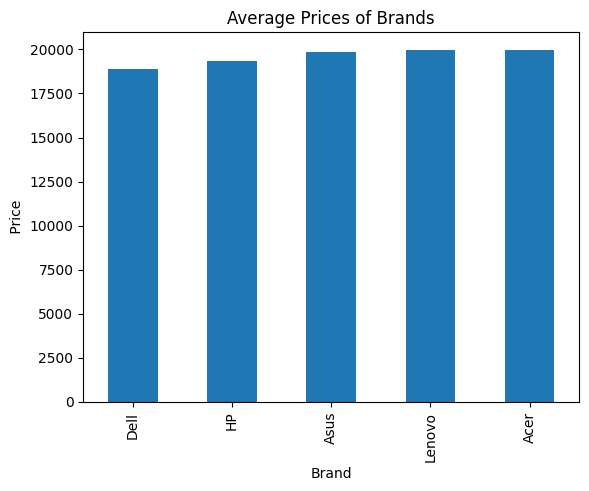

In [15]:
data.groupby("Brand")["Price"].mean().sort_values(ascending=True).plot(kind="bar")
plt.title("Average Prices of Brands")
plt.ylabel(" Price ")
plt.show()

In [16]:
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [17]:
data.groupby("RAM_Size")["Brand"].value_counts()

RAM_Size  Brand 
4         HP        59
          Acer      50
          Dell      48
          Asus      47
          Lenovo    39
8         Asus      66
          Lenovo    51
          Acer      48
          Dell      43
          HP        38
16        Dell      52
          HP        49
          Acer      47
          Asus      47
          Lenovo    42
32        Dell      67
          Acer      59
          Lenovo    58
          Asus      46
          HP        44
Name: count, dtype: int64

In [18]:
data.groupby("RAM_Size")["Brand"].value_counts().reset_index()

,RAM_Size,Brand,count
0,4,HP,59
1,4,Acer,50
2,4,Dell,48
3,4,Asus,47
4,4,Lenovo,39
5,8,Asus,66
6,8,Lenovo,51
7,8,Acer,48
8,8,Dell,43
9,8,HP,38


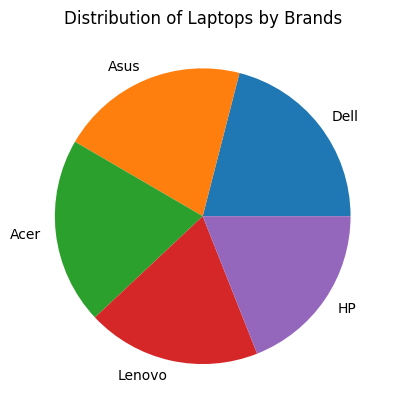

In [19]:
data["Brand"].value_counts().plot(kind="pie")
plt.title("Distribution of Laptops by Brands")
plt.ylabel("")
plt.show()

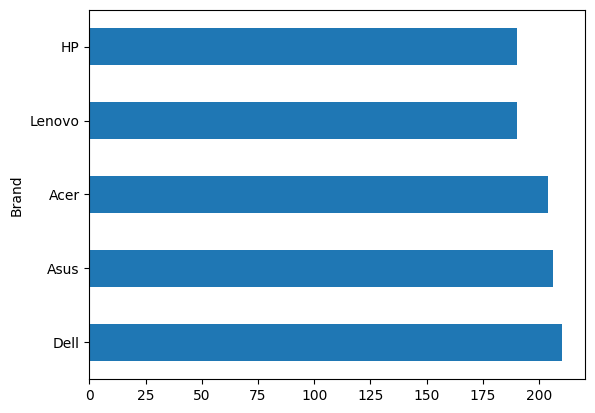

In [20]:
data["Brand"].value_counts().plot(kind="barh")
plt.show()

In [21]:
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [22]:
y = data["Price"]
X = data[["Processor_Speed","RAM_Size","Storage_Capacity"]]


In [23]:
X

,Processor_Speed,RAM_Size,Storage_Capacity
0,3.830296,16,512
1,2.912833,4,1000
2,3.241627,4,256
3,3.806248,16,512
4,3.268097,32,1000
...,...,...,...
995,3.343584,4,1000
996,2.780555,8,256
997,3.200569,4,512
998,1.604182,8,256


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [26]:
print(len(X_train))
print(len(y_train))


800
800


In [27]:
print(len(X_test))
print(len(y_test))

200
200


In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rfrmodel = RandomForestRegressor()

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameter_grid_rfr = {"max_depth" : [2,5,10,15,20,25] , "max_features" : ["auto","log2"] , "n_estimators" : [2,4,6,8,10,12]}

In [32]:
gridrfr = GridSearchCV(rfrmodel, parameter_grid_rfr)

In [33]:
gridrfr.fit(X_train,y_train)

c:\Users\poosh\OneDrive\Personal_projects\python\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\poosh\OneDrive\Personal_projects\python\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\poosh\OneDrive\Personal_projects\python\venv\lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Users\poosh\OneDrive\Personal_projects\python\venv\lib\site-packages\sklearn\base.py"

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [2, 5, ...], 'max_features': ['auto', 'log2'], 'n_estimators': [2, 4, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [34]:
gridrfr.best_params_

{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 10}

In [35]:
predictions = gridrfr.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
mean_absolute_error(y_test,predictions)

281.42201940123266

In [38]:
data["Price"].describe()

count     1000.000000
mean     19604.187963
std       9406.064880
min       8570.012950
25%      10114.012948
50%      17287.241878
75%      31566.214754
max      33503.935037
Name: Price, dtype: float64

In [39]:
X.columns

Index(['Processor_Speed', 'RAM_Size', 'Storage_Capacity'], dtype='object')

In [40]:
gridrfr

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [2, 5, ...], 'max_features': ['auto', 'log2'], 'n_estimators': [2, 4, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [41]:
import joblib

joblib.dump(gridrfr,"rf_model.pkl")

['rf_model.pkl']

In [42]:
print(4+5)

9
